<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Business Analytics - MSc**
##CS6501 - MACHINE LEARNING APPLICATIONS 

###Instructor: Enrique Naredo
###CS6501_Etivity 1


In [ ]:
#@title Current Date
Today = '2021-09-19' #@param {type:"date"}


# **INTRODUCTION:**

**Problem Statement:**
The problem statement addressed here is a form of supervised classification problem. Supervised learning presents us with a powerful tool to categorize and process data using machine learning. The classification techniques utilized in supervised learning focuses on predicting a qualitative response by recognizing patterns and analyzing data from the dataset. The goal of Supervised Learning is to connect the given input and the respective output. Some of the classification methodologies coming under Supervised Learning is Logistic Regression,SVM, Gaussian Naive Bayes, Random Forest which are said to be some of the most useful regression method for solving binary classification problem. 

Data is the collection of systematic facts or statistical information such as numeric values, pictures etc which is utilized for a specific purpose.

In the current problem, we are using four datasets: -
	
 

1.   Synthetic Dataset: This dataset is an example of Control Charts.
2.   Iris Dataset: This dataset is an example of Patter Recognition Literature.
3.   Wine Dataset: This is a chemical analysis of wines grown in three different regions of Italy
4.   Breast Cancer Dataset: The Breast cancer wisconsin (diagnostic) dataset is freely available in skilearn library. Also, this dataset is publicaly available in UCI Machine learning Repository.	
 
 

# **LOGISTIC REGRESSION**

Logistic regression is a statistical analysis method used to predict a data value based on prior observations of a data set. In regression analysis, logistic regression is estimating the parameters of a logistic model in order to find the probability of event=True and event=False.

This regression method is used when the dependent variable is binary (0/ 1, True/ False, Yes/ No) where the value of Y ranges from 0 to 1 and it can represented by following equation where p is the probability of presence of the characteristic of interest

odds= p/ (1-p) = probability of event occurrence / probability of no event occurrence

ln(odds) = ln(p/(1-p))

logit(p) = ln(p/(1-p)) = b0 + b1X1 + b2X2 + b3X3....+ bkXk

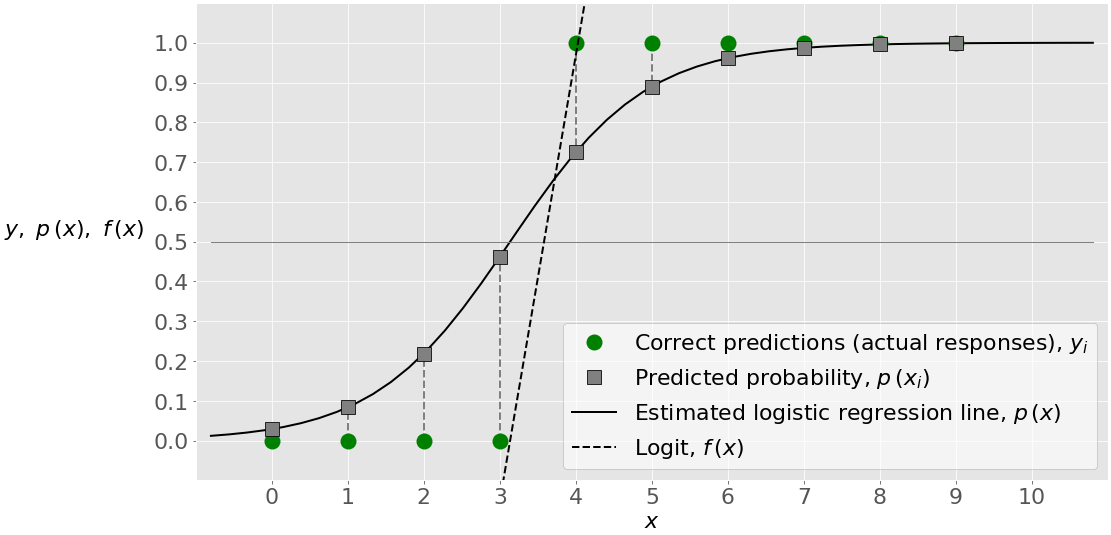

# **SUPPORT VECTOR MACHINE**

It is one of the supervised learning methods used for classification and regression. In SVM, datas are plotted on a plane and a hyperplane is used to separate the data into different classes.

For example; classification of data with 2 features

Here, support vectors are the points which is closer to the hyperplane. Margin is the distance between the hyperplane and nearest points from either side.


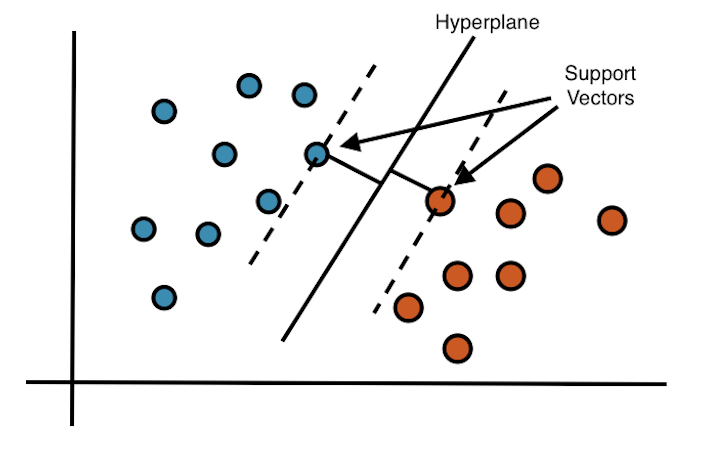

# **GAUSSIAN NAIVE BAYES**


Bayes theorem is used for calculating conditional probability. 


Formula For Bayes' Theorem
\begin{aligned} &P\left(A|B\right)=\frac{P\left(A\bigcap{B}\right)}{P\left(B\right)}=\frac{P\left(A\right)\cdot{P\left(B|A\right)}}{P\left(B\right)}\\ &\textbf{where:}\\ &P\left(A\right)=\text{ The probability of A occurring}\\ &P\left(B\right)=\text{ The probability of B occurring}\\ &P\left(A|B\right)=\text{The probability of A given B}\\ &P\left(B|A\right)=\text{ The probability of B given A}\\ &P\left(A\bigcap{B}\right))=\text{ The probability of both A and B occurring}\\ \end{aligned} 
​
  
In case of continuous data, values associated with each class is distribusted based on gaussian distribution.

for example: 

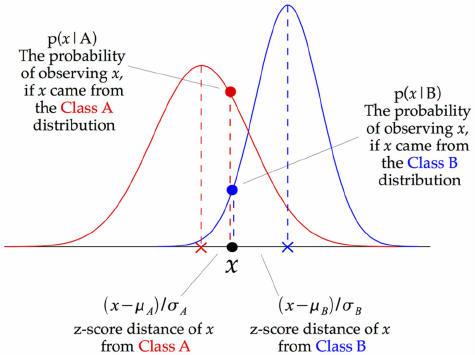


This is how a gaussian classifier works for continuous data. At every data point, the z-score distance between that point and each class-mean is calculated


# **RANDOM FOREST**

Decision tree is the foundation of random forest. The random forest model provided by the sklearn library has around 19 model parameters. Random Forest Algorithm can handle the data set containing continuous variables as in the case of regression and categorical variables as in the case of classification.

Hyperparameters used in random forest are:

1. n_estimators– number of trees the algorithm builds before averaging the predictions.

2. max_features– maximum number of features random forest considers splitting a node.

3. mini_sample_leaf– determines the minimum number of leaves required to split an internal node.



# **K FOLD**

In K fold cross validation the data set is split into k number of functions. Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.







## **Import statements and defining Methods**

In [ ]:
# import libraries
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, r2_score, recall_score, precision_score, f1_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
import warnings # Disable package depreciation warnings

In [ ]:
#Common method to split dataset into Test-Train
def splitdata_tt(X,y):
  X1_train,X1_test,y1_train,y1_test = train_test_split(X, y, test_size=0.20)
  sc=StandardScaler()
  X1_train=sc.fit_transform(X1_train)
  X1_test=sc.transform(X1_test)
  X1=sc.fit_transform(X)
  return X1_train, X1_test, y1_train, y1_test,X1

In [ ]:
#Common method to calculate scores for Train-Test
def scoring_tt(X_train,X_test,y_train,y_test,datasetname,classno,modelname):
  a=["LOGISTIC REGRESSION","LINEAR SVM","GAUSSIAN NAIVE BAYES","RANDOM FORESTS"]
  print(a[classno],"for ",datasetname,"Dataset: \n")
  y_pred=modelname.predict(X_test)
  rocaucscore = {'roc_auc': make_scorer(roc_auc_score, average='weighted', multi_class='ovr',needs_proba=True)}
  scores = cross_validate(modelname, X_train, y_train,cv = 10, scoring = rocaucscore)
  score=cross_val_score(modelname,X,y,cv=10)
  print("Accuracy score of prediction for ",datasetname,"Dataset: ",accuracy_score(y_test,y_pred))
  print("R^2 score for ",datasetname,"Dataset: ",r2_score(y_test,y_pred, multioutput='variance_weighted'))
  print("Precision score for ",datasetname,"Dataset: ",precision_score(y_test,y_pred,labels=[1,2],average='micro'))
  print("F1 score for ",datasetname,"Dataset: ",f1_score(y_test,y_pred, average='micro'))
  print("Recall score for ",datasetname,"Dataset: ",recall_score(y_test,y_pred,labels=[1,2],average='micro')) 
  print("ROC AUC: for", datasetname, "Dataset:", scores["test_roc_auc"].mean())
  print("Crossvalidation score for ",datasetname,"Dataset: ",score)
  print("Crossvalidation score mean: ",score.mean())
  print("Crossvalidation score standard deviation: ",score.std())
  plot_confusion_matrix(modelname, X_test, y_test)
  print("\n\n")

In [ ]:
#Methods to perform Logistic Regression, SVM, Gaussian NB and Random Bayes for Train-Test 
def logregress_tt(X_train,X_test,y_train,y_test,datasetname):
  LR_model = LogisticRegression()
  LR_model.fit(X_train, y_train)
  scoring_tt(X_train,X_test,y_train,y_test,datasetname,0,LR_model)

def supvector_tt(X_train,X_test,y_train,y_test,datasetname):
  classifier = SVC(kernel = 'linear', random_state = 0, probability=True)
  classifier.fit(X_train, y_train)
  scoring_tt(X_train,X_test,y_train,y_test,datasetname,1,classifier)

def gaussnb_tt(X_train,X_test,y_train,y_test,datasetname):
  classifier = GaussianNB()
  classifier.fit(X_train, y_train)
  scoring_tt(X_train,X_test,y_train,y_test,datasetname,2,classifier)

def randforest_tt(X_train,X_test,y_train,y_test,datasetname):
  classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  classifier.fit(X_train, y_train)
  scoring_tt(X_train,X_test,y_train,y_test,datasetname,3,classifier)

In [ ]:
#Method to split dataset into Test-Validate-Train and to scale and fit them using Standard Scaler
def splitdata_tvt(X,y):
  X1_train,X1_test,y1_train,y1_test = train_test_split(X, y, test_size=0.20)
  X1_train,X1_val,y1_train,y1_val=train_test_split(X1_train,y1_train,test_size=0.20)

  sc=StandardScaler()
  X1_train=sc.fit_transform(X1_train)
  X1_test=sc.transform(X1_test)
  X1_val=sc.transform(X1_val)
  X1=sc.fit_transform(X)
  return X1_train, X1_val, X1_test, y1_train, y1_val, y1_test,X1

In [ ]:
#Method to calculate scores for Train-Validate-Test
def scoring_tvt(X_train,X_val,X_test,y_train,y_val,y_test,datasetname,classno,modelname):
  a=["LOGISTIC REGRESSION","LINEAR SVM","GAUSSIAN NAIVE BAYES","RANDOM FORESTS"]
  print(a[classno],"for ",datasetname,"Dataset: \n")
  print("Score for validation data of ",datasetname,"Dataset: ",modelname.score(X_val,y_val))
  y_pred=modelname.predict(X_val)
  rocaucscore = {'roc_auc': make_scorer(roc_auc_score, average='macro', multi_class='ovr',needs_proba=True)}
  scores = cross_validate(modelname, X_train, y_train,
        cv = 10, scoring = rocaucscore)
  print("Accuracy score of prediction for ",datasetname,"Dataset: ",accuracy_score(y_val,y_pred))
  print("R^2 scorefor ",datasetname,"Dataset: ",r2_score(y_val,y_pred, multioutput='variance_weighted'))
  print("Precision score for ",datasetname,"Dataset: ",precision_score(y_val,y_pred,labels=[1,2],average='micro'))
  print("F1 score for ",datasetname,"Dataset: ",f1_score(y_val,y_pred, average='micro'))
  print("Recall score for ",datasetname,"Dataset: ",recall_score(y_val,y_pred,labels=[1,2],average='micro'))
  print("ROC AUC: for", datasetname, "Dataset:", scores["test_roc_auc"].mean())
  score=cross_val_score(modelname,X,y,cv=10)
  print("Crossvalidation score for ",datasetname,"Dataset: ",score)
  print("Crossvalidation score mean: ",score.mean())
  print("Crossvalidation score standard deviation: ",score.std())
  plot_confusion_matrix(modelname, X_test, y_test)
  print("\n\n")

In [ ]:
#Method to perform Logistic Regression, SVM, Gaussian NB and Random Bayes for Train-Validate-Test 
def logregress(X_train,X_val,X_test,y_train,y_val,y_test,datasetname):
  LR_model = LogisticRegression()
  LR_model.fit(X_train, y_train)
  scoring_tvt(X_train,X_val,X_test,y_train,y_val,y_test,datasetname,0,LR_model)

def supvector(X_train,X_val,X_test,y_train,y_val,y_test,datasetname):
  classifier = SVC(kernel = 'linear', random_state = 0, probability=True)
  classifier.fit(X_train, y_train)
  scoring_tvt(X_train,X_val,X_test,y_train,y_val,y_test,datasetname,1,classifier)

def gaussnb(X_train,X_val,X_test,y_train,y_val,y_test,datasetname):
  classifier = GaussianNB()
  classifier.fit(X_train, y_train)
  scoring_tvt(X_train,X_val,X_test,y_train,y_val,y_test,datasetname,2,classifier)

def randforest(X_train,X_val,X_test,y_train,y_val,y_test,datasetname):
  classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  classifier.fit(X_train, y_train)
  scoring_tvt(X_train,X_val,X_test,y_train,y_val,y_test,datasetname,3,classifier)

In [ ]:
#Method to perform Kfold and Cross Validation score
def kfold_scoring(classifier_kfold):
  results = cross_val_score(classifier_kfold, X, y, cv=kfold)
  print('Results from all folds: ',results)
  print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

## **1. SYNTHETIC DATASET**

Synthetic dataset is a dataset that contains fabricated or artificially created data, instead of values derived from actual experiments or analysis. It is generate with the purpose of preserving privacy, testing systems or creating training data for machine learning algorithms.This dataset is widely used in AI model training , as test data for new products, etc. Synthetic data has several benefits over real data:



1. Overcoming real data usage restrictions: Real data may have usage constraints due to privacy rules or other regulations. Synthetic data can replicate all important statistical properties of real data without exposing real data, thereby eliminating the issue.

2. Creating data to simulate not yet encountered conditions: Where real data does not exist, synthetic data is the only solution.

In [ ]:
#Function call to load synthetic dataset with features
def loadset(setname):
    d1={
      'synthetic':[loadsynth,['f1','f2','f3','f4','f5','f6']] }
    return coreload(*d1[setname])

In [ ]:
#Function to load synthetic dataset with features
def coreload(fnname,labels):
    dataset= fnname()
    df=pd.DataFrame(data=dataset['data'],columns=labels)
    df['class'] = dataset['target']
    return df
  #print(df['class'].value_counts())

In [ ]:
#Synthetic dataset using make_classification
def loadsynth():
    x, y = make_classification(n_classes=3,
                            n_features=6,
                            n_samples=200, 
                            n_redundant=0, 
                            n_informative=6,
                            n_clusters_per_class=1)
    return {'data':x,'target':y,
            'target_names': ['class0','class1','class2'],
            'feature_names':['f1','f2','f3','f4','f5','f6']}

In [ ]:
#Passing the dataset to a dataframe
df1=loadset('synthetic')
dataname="Synthetic"

### **1.1 HISTOGRAM**

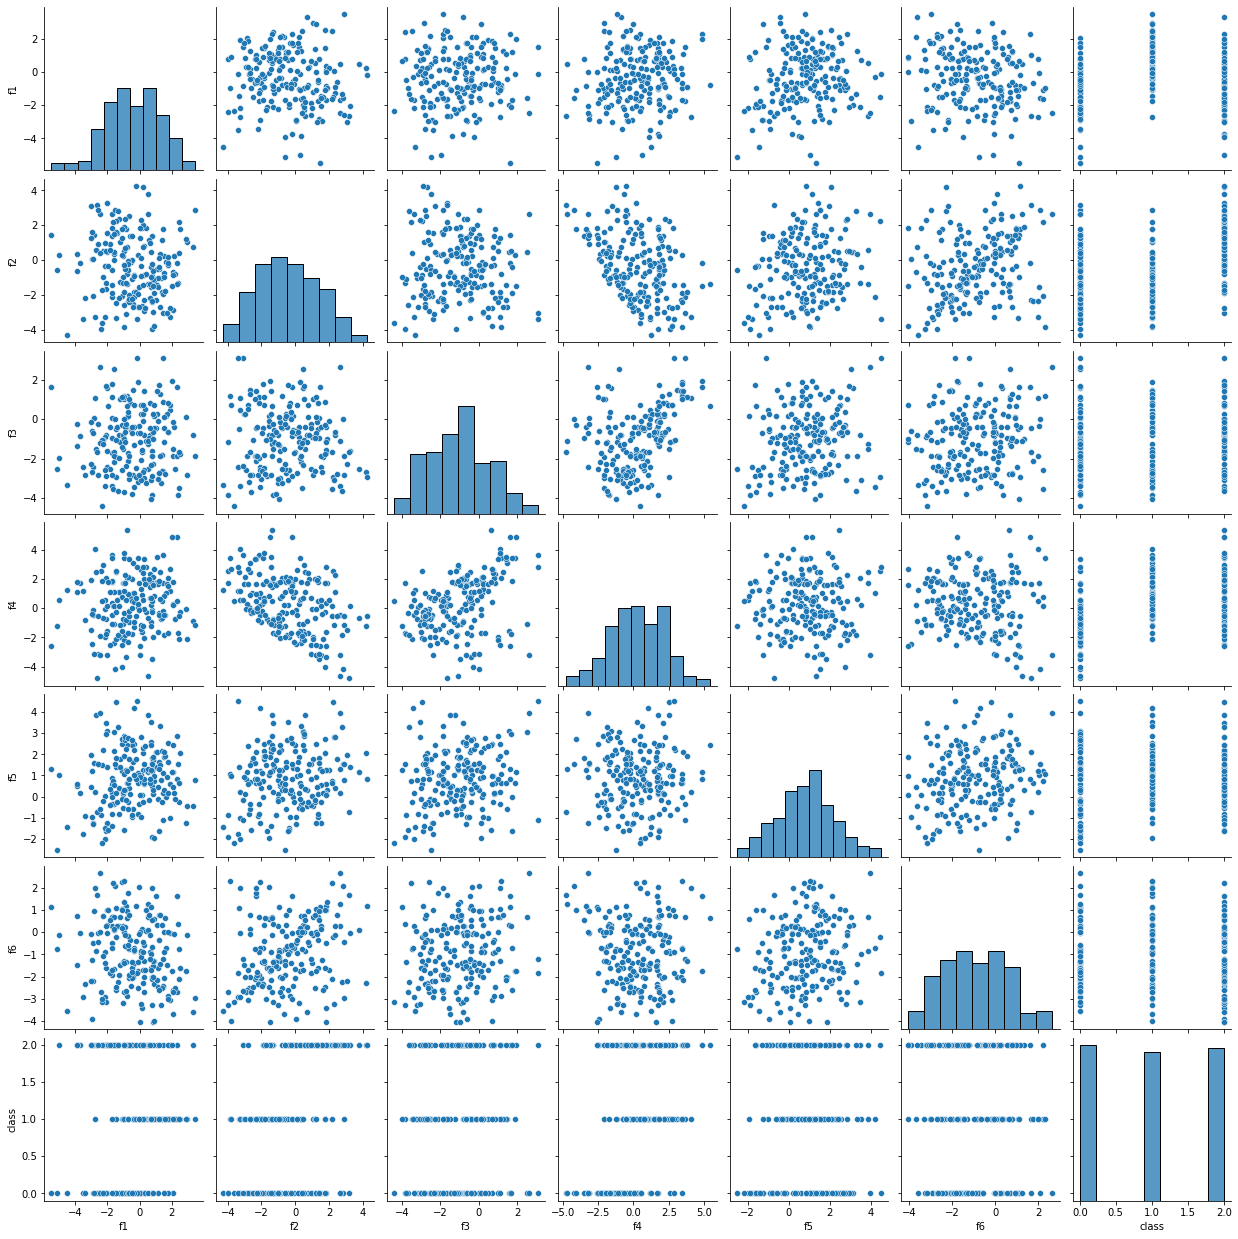

In [ ]:
#Plot histogram
sns.pairplot(df1,palette="bright", kind= "scatter", diag_kind= "hist", hue=None )

### **1.2 TRAIN-TEST**

In [ ]:
#Drop column class
X=df1.drop(columns='class')
y=df1['class']

In [ ]:
#Splitting data Test-Train
X_train,X_test,y_train,y_test,X=splitdata_tt(X,y)

LOGISTIC REGRESSION for  Synthetic Dataset: 

Accuracy score of prediction for  Synthetic Dataset:  0.85
R^2 score for  Synthetic Dataset:  0.7075548334687246
Precision score for  Synthetic Dataset:  0.8076923076923077
F1 score for  Synthetic Dataset:  0.85
Recall score for  Synthetic Dataset:  0.8076923076923077
ROC AUC: for Synthetic Dataset: 0.9507386363636362
Crossvalidation score for  Synthetic Dataset:  [1.   0.8  0.8  0.8  0.85 0.8  0.85 0.8  0.9  0.95]
Crossvalidation score mean:  0.8550000000000001
Crossvalidation score standard deviation:  0.06873863542433759





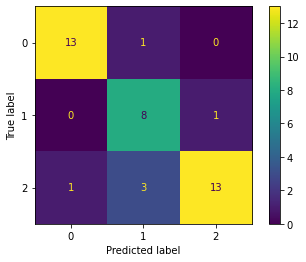

In [ ]:
#Perform Logistic Regression
logregress_tt(X_train,X_test,y_train,y_test,dataname)

LINEAR SVM for  Synthetic Dataset: 

Accuracy score of prediction for  Synthetic Dataset:  0.95
R^2 score for  Synthetic Dataset:  0.9350121852152722
Precision score for  Synthetic Dataset:  0.9230769230769231
F1 score for  Synthetic Dataset:  0.9500000000000001
Recall score for  Synthetic Dataset:  0.9230769230769231
ROC AUC: for Synthetic Dataset: 0.9646022727272727
Crossvalidation score for  Synthetic Dataset:  [1.   0.85 0.8  0.9  0.85 0.75 0.9  0.9  1.   0.9 ]
Crossvalidation score mean:  0.8850000000000001
Crossvalidation score standard deviation:  0.07433034373659253





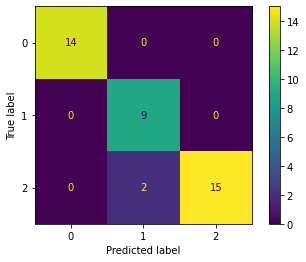

In [ ]:
#Perform SVM
supvector_tt(X_train,X_test,y_train,y_test,dataname)

GAUSSIAN NAIVE BAYES for  Synthetic Dataset: 

Accuracy score of prediction for  Synthetic Dataset:  0.725
R^2 score for  Synthetic Dataset:  0.545085296506905
Precision score for  Synthetic Dataset:  0.6296296296296297
F1 score for  Synthetic Dataset:  0.7250000000000001
Recall score for  Synthetic Dataset:  0.6538461538461539
ROC AUC: for Synthetic Dataset: 0.851875
Crossvalidation score for  Synthetic Dataset:  [0.85 0.8  0.65 0.65 0.65 0.7  0.9  0.6  0.9  0.75]
Crossvalidation score mean:  0.7450000000000001
Crossvalidation score standard deviation:  0.10594810050208546





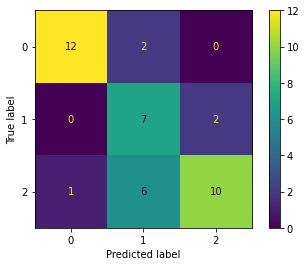

In [ ]:
#Perform Gaussian NB
gaussnb_tt(X_train,X_test,y_train,y_test,dataname)

RANDOM FORESTS for  Synthetic Dataset: 

Accuracy score of prediction for  Synthetic Dataset:  0.85
R^2 score for  Synthetic Dataset:  0.8050365556458163
Precision score for  Synthetic Dataset:  0.8
F1 score for  Synthetic Dataset:  0.85
Recall score for  Synthetic Dataset:  0.7692307692307693
ROC AUC: for Synthetic Dataset: 0.8981534090909091
Crossvalidation score for  Synthetic Dataset:  [0.95 0.8  0.8  0.7  0.8  0.85 0.85 0.7  0.95 0.75]
Crossvalidation score mean:  0.8149999999999998
Crossvalidation score standard deviation:  0.08381527307120104





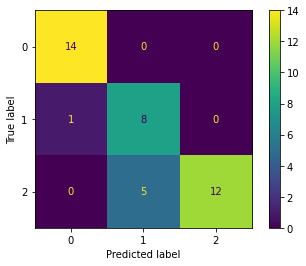

In [ ]:
#Perform Random forest
randforest_tt(X_train,X_test,y_train,y_test,dataname)

### **1.3 TRAIN-VALIDATION-TEST**

In [ ]:
#Drop column class
X=df1.drop(columns='class')
y=df1['class']

In [ ]:
#Splitting data Train-Validate-Test
X_train,X_test,y_train,y_test,X=splitdata_tt(X,y)
X_train,X_val,X_test,y_train,y_val,y_test,X=splitdata_tvt(X,y)

LOGISTIC REGRESSION for  Synthetic Dataset: 

Score for validation data of  Synthetic Dataset:  0.71875
Accuracy score of prediction for  Synthetic Dataset:  0.71875
R^2 scorefor  Synthetic Dataset:  0.5909090909090908
Precision score for  Synthetic Dataset:  0.55
F1 score for  Synthetic Dataset:  0.71875
Recall score for  Synthetic Dataset:  0.6875
ROC AUC: for Synthetic Dataset: 0.9610648148148148
Crossvalidation score for  Synthetic Dataset:  [1.   0.8  0.8  0.8  0.85 0.8  0.85 0.8  0.9  0.95]
Crossvalidation score mean:  0.8550000000000001
Crossvalidation score standard deviation:  0.06873863542433759





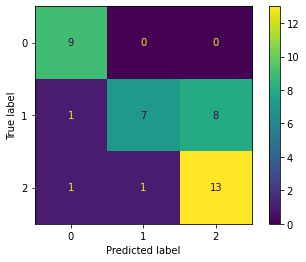

In [ ]:
#Perform Logistic Regression
logregress(X_train,X_val,X_test,y_train,y_val,y_test,dataname)

LINEAR SVM for  Synthetic Dataset: 

Score for validation data of  Synthetic Dataset:  0.75
Accuracy score of prediction for  Synthetic Dataset:  0.75
R^2 scorefor  Synthetic Dataset:  0.6363636363636364
Precision score for  Synthetic Dataset:  0.6
F1 score for  Synthetic Dataset:  0.75
Recall score for  Synthetic Dataset:  0.75
ROC AUC: for Synthetic Dataset: 0.9684953703703704
Crossvalidation score for  Synthetic Dataset:  [1.   0.85 0.8  0.9  0.85 0.75 0.9  0.9  1.   0.9 ]
Crossvalidation score mean:  0.8850000000000001
Crossvalidation score standard deviation:  0.07433034373659253





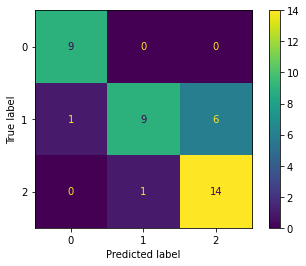

In [ ]:
#Perform SVM
supvector(X_train,X_val,X_test,y_train,y_val,y_test,dataname)

GAUSSIAN NAIVE BAYES for  Synthetic Dataset: 

Score for validation data of  Synthetic Dataset:  0.6875
Accuracy score of prediction for  Synthetic Dataset:  0.6875
R^2 scorefor  Synthetic Dataset:  0.5454545454545454
Precision score for  Synthetic Dataset:  0.5
F1 score for  Synthetic Dataset:  0.6875
Recall score for  Synthetic Dataset:  0.625
ROC AUC: for Synthetic Dataset: 0.8741203703703704
Crossvalidation score for  Synthetic Dataset:  [0.85 0.8  0.65 0.65 0.65 0.7  0.9  0.6  0.9  0.75]
Crossvalidation score mean:  0.7450000000000001
Crossvalidation score standard deviation:  0.10594810050208546





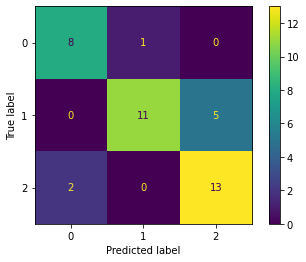

In [ ]:
#Perform Gaussian NB
gaussnb(X_train,X_val,X_test,y_train,y_val,y_test,dataname)

RANDOM FORESTS for  Synthetic Dataset: 

Score for validation data of  Synthetic Dataset:  0.75
Accuracy score of prediction for  Synthetic Dataset:  0.75
R^2 scorefor  Synthetic Dataset:  0.5
Precision score for  Synthetic Dataset:  0.5882352941176471
F1 score for  Synthetic Dataset:  0.75
Recall score for  Synthetic Dataset:  0.625
ROC AUC: for Synthetic Dataset: 0.9291435185185184
Crossvalidation score for  Synthetic Dataset:  [0.95 0.8  0.8  0.7  0.8  0.85 0.85 0.7  0.95 0.75]
Crossvalidation score mean:  0.8149999999999998
Crossvalidation score standard deviation:  0.08381527307120104





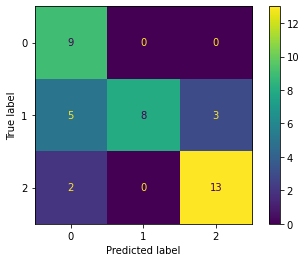

In [ ]:
#Perform Random Forest
randforest(X_train,X_val,X_test,y_train,y_val,y_test,dataname)

### **1.4 KFOLD**

In [ ]:
#Drop column class
X=df1.drop(columns='class')
y=df1['class']

In [ ]:
#Perform KFold split
kfold = KFold(n_splits=4, random_state=0, shuffle=True)
# print the folds
for X_train, X_test in kfold.split(X):
  print("Train: %s \nTest: %s\n" % (X_train, X_test))

Train: [  0   1   2   3   6   9  10  11  13  14  15  17  19  20  21  23  24  25
  27  28  29  30  31  32  34  35  36  38  39  40  41  42  43  46  47  48
  49  50  51  52  53  54  56  57  58  59  62  64  65  67  68  69  70  71
  72  73  76  77  78  79  81  82  84  85  86  87  88  89  90  91  92  93
  94  95  96  97  99 100 101 102 103 104 105 108 109 110 112 114 115 116
 117 119 120 121 124 126 127 128 131 132 133 135 136 137 138 139 140 141
 142 144 147 148 149 151 153 155 156 157 158 160 161 162 163 164 165 166
 167 169 171 172 173 174 175 176 178 181 184 186 187 188 190 191 192 193
 194 195 196 197 198 199] 
Test: [  4   5   7   8  12  16  18  22  26  33  37  44  45  55  60  61  63  66
  74  75  80  83  98 106 107 111 113 118 122 123 125 129 130 134 143 145
 146 150 152 154 159 168 170 177 179 180 182 183 185 189]

Train: [  0   1   3   4   5   6   7   8   9  11  12  13  15  16  17  18  20  21
  22  23  25  26  28  29  31  32  33  34  35  36  37  38  39  41  42  44
  45  47  48  49  

Logistic Regression

In [ ]:
#Perform Logistic Regression and calculate scoring
classifier = LogisticRegression()
kfold_scoring(classifier)

Results from all folds:  [0.9  0.92 0.86 0.84]
Accuracy: 88.000% (3.162%)


Support Vector Machine

In [ ]:
#Perform SVM and calculate scoring
classifier = SVC(kernel = 'linear', random_state = 0, probability=True)
kfold_scoring(classifier)

Results from all folds:  [0.9  0.9  0.88 0.9 ]
Accuracy: 89.500% (0.866%)


Gaussian Naive Bayes

In [ ]:
#Perform GNB and calculate scoring
classifier = GaussianNB()
kfold_scoring(classifier)

Results from all folds:  [0.84 0.72 0.66 0.76]
Accuracy: 74.500% (6.538%)


Random Forests

In [ ]:
#Perform Random Forest and calculate scoring
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
kfold_scoring(classifier)

Results from all folds:  [0.88 0.86 0.78 0.82]
Accuracy: 83.500% (3.841%)


## **2. IRIS DATASET**


The Iris data set contains 3 classes of 50 instances wherein each of the class points to a type of iris plant. One class is linearly separable from the other 2 and the hindmost are not linearly separable from each other.

**Attribute Details:**


sepal length (cm)

sepal width (cm)

petal length (cm)

petal width (cm)



**class:**


a. Iris Setosa

b. Iris Versicolour

c. Iris Virginica



Attribute Predicted: class of the iris plant.

Technique used to Split the Dataset for Training and Testing: -

As we have utilized .csv files, thus, we have used both Indexing and Slicing for the same.

We use the iloc() function which enabled us to select a particular cell from the dataset.

Method:
1. Downloaded the Iris dataset from the UCI Repository. ‘wget’ Command was utilized to upload the files into our Google Colab. The uploaded files were read using Pandas

2. Column Labels were introduced into the table using the ‘dataset.columns’

3. Count of each class of dataset was taken and using Matplotlib, we created different graphs for Sepal Length and Petal Length. As we used the csv files and not the dataframe, thus, we created a dictionary for different colors for each class of the dataset using the ‘map’ function.

4. Sklearn library functions was used so as to get Logistic Regression and Plot Decision region.

5. We split the dataset into train and test and since, the dataset was in the form of dataframes and not arrays, we thus used the iloc() and labelencoder() function to get the value for y2 in the form of an array. For X2, we used 2 numpy operations to convert it to a numpy.ndarray datatype.

6. Scatter Plot was plotted for the class, and the length and width of the Sepals and Petals.

7. The dataset was then split into training and testing dataset. 70% of the dataset was taken as training set and the remaining as testing set.

8. The training dataset was then standardized using StandardAero to bring multiscaled variables to a common scale for providing better accuracy.

9. For the Logistic Regression Models, using Plot Decision Regions, we plotted the decision boundary for Test and Training.

10. The accuracy of the model is then predicted using the test data

In [ ]:
#Load IRIS dataset

from sklearn import datasets

iris = datasets.load_iris()

irisdata = pd.DataFrame(data=iris.data, columns=iris.feature_names)

irisdata["label"] = iris.target

dataname = 'iris'

### **2.1 HISTOGRAM**

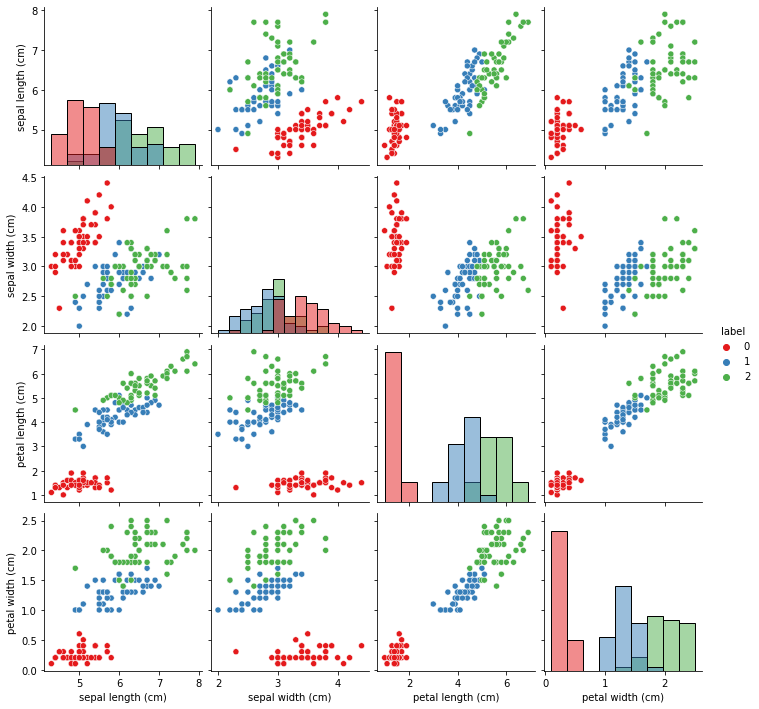

In [ ]:
#Plot histogram
sns.pairplot(irisdata, hue="label",palette="Set1", kind= "scatter", diag_kind= "hist" )

### **2.2 TRAIN-TEST**

In [ ]:
#Drop column class
X=df1.drop(columns='class')
y=df1['class']

In [ ]:
#Splitting data Test-Train
X_train,X_test,y_train,y_test,X=splitdata_tt(X,y)

LOGISTIC REGRESSION for  iris Dataset: 

Accuracy score of prediction for  iris Dataset:  0.875
R^2 score for  iris Dataset:  0.7180616740088106
Precision score for  iris Dataset:  0.8846153846153846
F1 score for  iris Dataset:  0.875
Recall score for  iris Dataset:  0.8214285714285714
ROC AUC: for iris Dataset: 0.9494886363636363
Crossvalidation score for  iris Dataset:  [1.   0.8  0.8  0.8  0.85 0.8  0.85 0.8  0.9  0.95]
Crossvalidation score mean:  0.8550000000000001
Crossvalidation score standard deviation:  0.06873863542433759





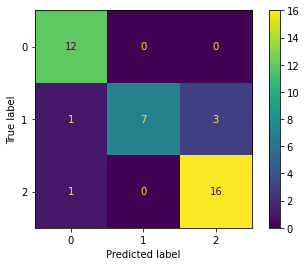

In [ ]:
#Perform Logistic Regression
logregress_tt(X_train,X_test,y_train,y_test,dataname)

LINEAR SVM for  iris Dataset: 

Accuracy score of prediction for  iris Dataset:  0.95
R^2 score for  iris Dataset:  0.9295154185022027
Precision score for  iris Dataset:  0.9285714285714286
F1 score for  iris Dataset:  0.9500000000000001
Recall score for  iris Dataset:  0.9285714285714286
ROC AUC: for iris Dataset: 0.9628977272727273
Crossvalidation score for  iris Dataset:  [1.   0.85 0.8  0.9  0.85 0.75 0.9  0.9  1.   0.9 ]
Crossvalidation score mean:  0.8850000000000001
Crossvalidation score standard deviation:  0.07433034373659253





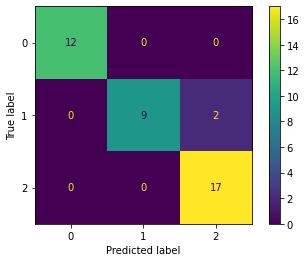

In [ ]:
#Perform SVM
supvector_tt(X_train,X_test,y_train,y_test,dataname)

GAUSSIAN NAIVE BAYES for  iris Dataset: 

Accuracy score of prediction for  iris Dataset:  0.675
R^2 score for  iris Dataset:  0.013215859030836996
Precision score for  iris Dataset:  0.7272727272727273
F1 score for  iris Dataset:  0.675
Recall score for  iris Dataset:  0.5714285714285714
ROC AUC: for iris Dataset: 0.8798295454545455
Crossvalidation score for  iris Dataset:  [0.85 0.8  0.65 0.65 0.65 0.7  0.9  0.6  0.9  0.75]
Crossvalidation score mean:  0.7450000000000001
Crossvalidation score standard deviation:  0.10594810050208546





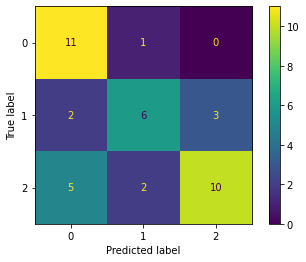

In [ ]:
#Perform GNB
gaussnb_tt(X_train,X_test,y_train,y_test,dataname)

RANDOM FORESTS for  iris Dataset: 

Accuracy score of prediction for  iris Dataset:  0.85
R^2 score for  iris Dataset:  0.6828193832599119
Precision score for  iris Dataset:  0.8518518518518519
F1 score for  iris Dataset:  0.85
Recall score for  iris Dataset:  0.8214285714285714
ROC AUC: for iris Dataset: 0.9323863636363636
Crossvalidation score for  iris Dataset:  [0.95 0.8  0.8  0.7  0.8  0.85 0.85 0.7  0.95 0.75]
Crossvalidation score mean:  0.8149999999999998
Crossvalidation score standard deviation:  0.08381527307120104





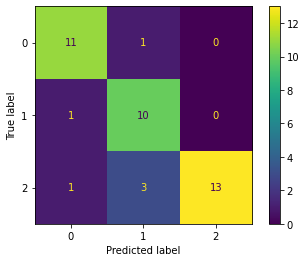

In [ ]:
#Perform Random Forest
randforest_tt(X_train,X_test,y_train,y_test,dataname)

### **2.3 TRAIN-VALIDATION_TEST**

In [ ]:
#Drop column class
X=df1.drop(columns='class')
y=df1['class']

In [ ]:
#Splitting data Train-Validate-Test
X_train,X_test,y_train,y_test,X=splitdata_tt(X,y)
X_train,X_val,X_test,y_train,y_val,y_test,X=splitdata_tvt(X,y)

LOGISTIC REGRESSION for  iris Dataset: 

Score for validation data of  iris Dataset:  0.875
Accuracy score of prediction for  iris Dataset:  0.875
R^2 scorefor  iris Dataset:  0.6309719934102141
Precision score for  iris Dataset:  0.8571428571428571
F1 score for  iris Dataset:  0.875
Recall score for  iris Dataset:  0.8181818181818182
ROC AUC: for iris Dataset: 0.956574074074074
Crossvalidation score for  iris Dataset:  [1.   0.8  0.8  0.8  0.85 0.8  0.85 0.8  0.9  0.95]
Crossvalidation score mean:  0.8550000000000001
Crossvalidation score standard deviation:  0.06873863542433759





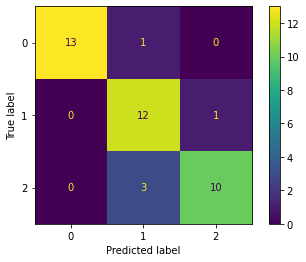

In [ ]:
#Perform Logistic Regression
logregress(X_train,X_val,X_test,y_train,y_val,y_test,dataname)

LINEAR SVM for  iris Dataset: 

Score for validation data of  iris Dataset:  0.84375
Accuracy score of prediction for  iris Dataset:  0.84375
R^2 scorefor  iris Dataset:  0.5782537067545305
Precision score for  iris Dataset:  0.85
F1 score for  iris Dataset:  0.84375
Recall score for  iris Dataset:  0.7727272727272727
ROC AUC: for iris Dataset: 0.9626851851851852
Crossvalidation score for  iris Dataset:  [1.   0.85 0.8  0.9  0.85 0.75 0.9  0.9  1.   0.9 ]
Crossvalidation score mean:  0.8850000000000001
Crossvalidation score standard deviation:  0.07433034373659253





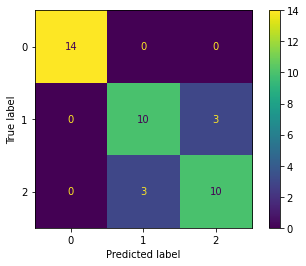

In [ ]:
#Perform SVM
supvector(X_train,X_val,X_test,y_train,y_val,y_test,dataname)

GAUSSIAN NAIVE BAYES for  iris Dataset: 

Score for validation data of  iris Dataset:  0.8125
Accuracy score of prediction for  iris Dataset:  0.8125
R^2 scorefor  iris Dataset:  0.36738056013179576
Precision score for  iris Dataset:  0.85
F1 score for  iris Dataset:  0.8125
Recall score for  iris Dataset:  0.7727272727272727
ROC AUC: for iris Dataset: 0.8735593033509701
Crossvalidation score for  iris Dataset:  [0.85 0.8  0.65 0.65 0.65 0.7  0.9  0.6  0.9  0.75]
Crossvalidation score mean:  0.7450000000000001
Crossvalidation score standard deviation:  0.10594810050208546





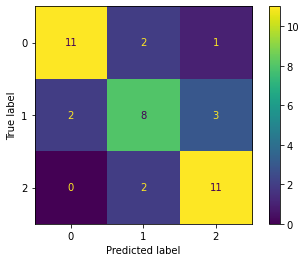

In [ ]:
#Perform GNB
gaussnb(X_train,X_val,X_test,y_train,y_val,y_test,dataname)

RANDOM FORESTS for  iris Dataset: 

Score for validation data of  iris Dataset:  0.78125
Accuracy score of prediction for  iris Dataset:  0.78125
R^2 scorefor  iris Dataset:  0.4728171334431631
Precision score for  iris Dataset:  0.7894736842105263
F1 score for  iris Dataset:  0.78125
Recall score for  iris Dataset:  0.6818181818181818
ROC AUC: for iris Dataset: 0.9191997354497354
Crossvalidation score for  iris Dataset:  [0.95 0.8  0.8  0.7  0.8  0.85 0.85 0.7  0.95 0.75]
Crossvalidation score mean:  0.8149999999999998
Crossvalidation score standard deviation:  0.08381527307120104





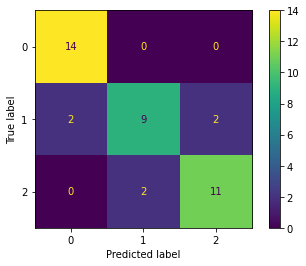

In [ ]:
#Perform Random Forest
randforest(X_train,X_val,X_test,y_train,y_val,y_test,dataname)

### **2.4 KFOLD**

In [ ]:
#Drop column class
X=df1.drop(columns='class')
y=df1['class']

In [ ]:
#Perform Kfold split
kfold = KFold(n_splits=4, random_state=0, shuffle=True)
# print the folds
for X_train, X_test in kfold.split(X):
  print("Train: %s \nTest: %s\n" % (X_train, X_test))

Train: [  0   1   2   3   6   9  10  11  13  14  15  17  19  20  21  23  24  25
  27  28  29  30  31  32  34  35  36  38  39  40  41  42  43  46  47  48
  49  50  51  52  53  54  56  57  58  59  62  64  65  67  68  69  70  71
  72  73  76  77  78  79  81  82  84  85  86  87  88  89  90  91  92  93
  94  95  96  97  99 100 101 102 103 104 105 108 109 110 112 114 115 116
 117 119 120 121 124 126 127 128 131 132 133 135 136 137 138 139 140 141
 142 144 147 148 149 151 153 155 156 157 158 160 161 162 163 164 165 166
 167 169 171 172 173 174 175 176 178 181 184 186 187 188 190 191 192 193
 194 195 196 197 198 199] 
Test: [  4   5   7   8  12  16  18  22  26  33  37  44  45  55  60  61  63  66
  74  75  80  83  98 106 107 111 113 118 122 123 125 129 130 134 143 145
 146 150 152 154 159 168 170 177 179 180 182 183 185 189]

Train: [  0   1   3   4   5   6   7   8   9  11  12  13  15  16  17  18  20  21
  22  23  25  26  28  29  31  32  33  34  35  36  37  38  39  41  42  44
  45  47  48  49  

 Logistic Regression

In [ ]:
#Perform Logistic Regression and calculate scores
classifier = LogisticRegression()
kfold_scoring(classifier)

Results from all folds:  [0.9  0.92 0.86 0.84]
Accuracy: 88.000% (3.162%)


SVM

In [ ]:
#Perform SVM and calculate scores
classifier = SVC(kernel = 'linear', random_state = 0, probability=True)
kfold_scoring(classifier)

Results from all folds:  [0.9  0.9  0.88 0.9 ]
Accuracy: 89.500% (0.866%)


Gaussian Naive Bayes

In [ ]:
#Perform GNB and calculate scores
classifier = GaussianNB()
kfold_scoring(classifier)

Results from all folds:  [0.84 0.72 0.66 0.76]
Accuracy: 74.500% (6.538%)


Random Forest

In [ ]:
#Perform Random forest and calculate scores
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
kfold_scoring(classifier)

Results from all folds:  [0.88 0.86 0.78 0.82]
Accuracy: 83.500% (3.841%)


## **3. WINE DATASET**


The Wine dataset tabulates the results and observations of the chemical analysis performed on wine distilled around a region in Italy, from three different cultivators. The thirteen constituents that were mainly focused on, are as follow:



*   Alcohol
*   Malic acid

*   Ash
*   Alkalinity of ash

*   Magnesium
*   Total phenols

*   Flavanoids
*   Nonflavanoid phenols

*   Proanthocyanins
*   Color intensity



*   Hue
*   OD280/OD315 of diluted wines

*   Proline

There are no missing values for any of these variables in the dataset.

Method:


1.  The wine dataset was first imported from the sklearn.datasets library.
2.  The dataset was retrieved in Bunch datatype format

1.  The Bunch datatype was then converted to pandas dataframe for easy usage of the data.

4.    Barplots were plotted for each variable with class variable on the independent axis using seaborn library to understand the variation in each variables according to class of wine
5. Histograms were also plotted for each of these variables to check the relation of class and each variable values to compare with those obtained from the barplot.
6. The dataset was then split into training and testing dataset.80% of the dataset was taken as training set and the remaining as testing set.
7. The training dataset was then standardised using StandardScaler to bring multiscaled variables to a common scale for providing better accuracy.
8. After standardisation, the model is then trained using Logistic Regression available in Scikitlearn library
9. The accuracy of the model is then predicted using the test data

In [ ]:
#Import and load Wine Dataset

from sklearn import datasets

wine = datasets.load_wine()

winedata = pd.DataFrame(data=wine.data, columns=wine.feature_names)

winedata["label"] = wine.target

dataname = 'wine'

### **3.1 HISTOGRAM**

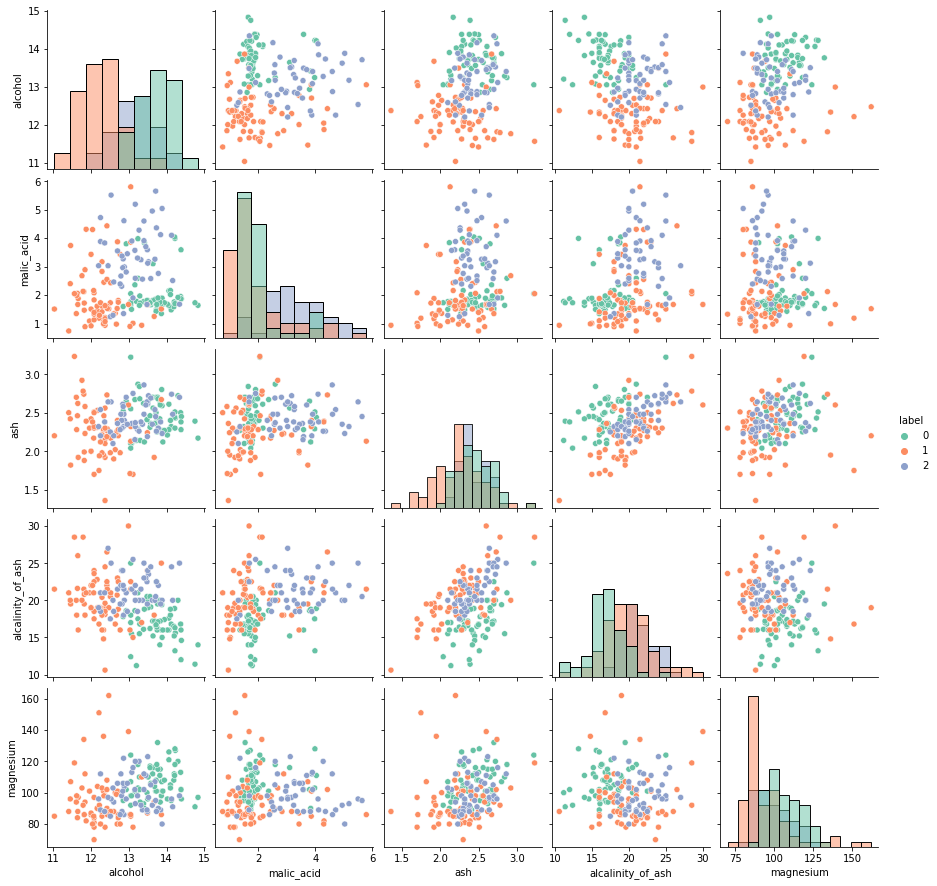

In [ ]:
#Plot histogram
sns.pairplot(winedata, hue="label",palette="Set2", kind= "scatter",vars = ['alcohol','malic_acid','ash','alcalinity_of_ash','magnesium'], diag_kind= "hist" )

### **3.2 TRAIN-TEST**

In [ ]:
#Drop column class
X=df1.drop(columns='class')
y=df1['class']

In [ ]:
#Split data into Train-Test
X_train,X_test,y_train,y_test,X=splitdata_tt(X,y) 

LOGISTIC REGRESSION for  wine Dataset: 

Accuracy score of prediction for  wine Dataset:  0.95
R^2 score for  wine Dataset:  0.9283154121863799
Precision score for  wine Dataset:  0.9259259259259259
F1 score for  wine Dataset:  0.9500000000000001
Recall score for  wine Dataset:  0.9259259259259259
ROC AUC: for wine Dataset: 0.9321022727272729
Crossvalidation score for  wine Dataset:  [1.   0.8  0.8  0.8  0.85 0.8  0.85 0.8  0.9  0.95]
Crossvalidation score mean:  0.8550000000000001
Crossvalidation score standard deviation:  0.06873863542433759





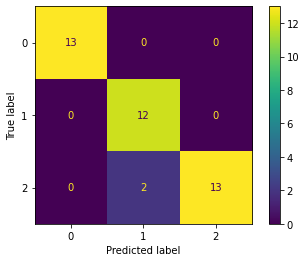

In [ ]:
#Calling Logistic Regression function for Train-Test
logregress_tt(X_train,X_test,y_train,y_test,dataname)

LINEAR SVM for  wine Dataset: 

Accuracy score of prediction for  wine Dataset:  0.975
R^2 score for  wine Dataset:  0.96415770609319
Precision score for  wine Dataset:  0.9629629629629629
F1 score for  wine Dataset:  0.975
Recall score for  wine Dataset:  0.9629629629629629
ROC AUC: for wine Dataset: 0.9493750000000001
Crossvalidation score for  wine Dataset:  [1.   0.85 0.8  0.9  0.85 0.75 0.9  0.9  1.   0.9 ]
Crossvalidation score mean:  0.8850000000000001
Crossvalidation score standard deviation:  0.07433034373659253





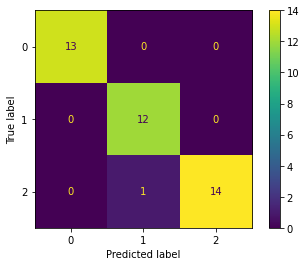

In [ ]:
#Calling SVM function for Train-Test
supvector_tt(X_train,X_test,y_train,y_test,dataname)

GAUSSIAN NAIVE BAYES for  wine Dataset: 

Accuracy score of prediction for  wine Dataset:  0.875
R^2 score for  wine Dataset:  0.8207885304659498
Precision score for  wine Dataset:  0.8275862068965517
F1 score for  wine Dataset:  0.875
Recall score for  wine Dataset:  0.8888888888888888
ROC AUC: for wine Dataset: 0.8601704545454545
Crossvalidation score for  wine Dataset:  [0.85 0.8  0.65 0.65 0.65 0.7  0.9  0.6  0.9  0.75]
Crossvalidation score mean:  0.7450000000000001
Crossvalidation score standard deviation:  0.10594810050208546





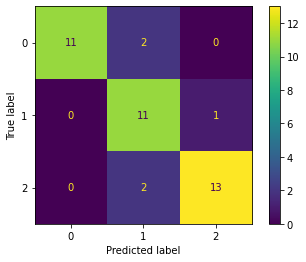

In [ ]:
#Calling GNB function for Train-Test
gaussnb_tt(X_train,X_test,y_train,y_test,dataname)

RANDOM FORESTS for  wine Dataset: 

Accuracy score of prediction for  wine Dataset:  0.925
R^2 score for  wine Dataset:  0.8924731182795699
Precision score for  wine Dataset:  0.8888888888888888
F1 score for  wine Dataset:  0.925
Recall score for  wine Dataset:  0.8888888888888888
ROC AUC: for wine Dataset: 0.9148863636363638
Crossvalidation score for  wine Dataset:  [0.95 0.8  0.8  0.7  0.8  0.85 0.85 0.7  0.95 0.75]
Crossvalidation score mean:  0.8149999999999998
Crossvalidation score standard deviation:  0.08381527307120104





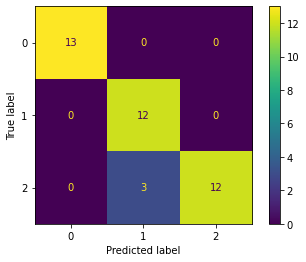

In [ ]:
#Calling Random Forest function for Train-Test
randforest_tt(X_train,X_test,y_train,y_test,dataname)

### **3.3 TRAIN-VALIDATION_TEST**

In [ ]:
#Drop column class
X=df1.drop(columns='class')
y=df1['class']

In [ ]:
#Split data into Train-Validate-Test
X_train,X_test,y_train,y_test,X=splitdata_tt(X,y)
X_train,X_val,X_test,y_train,y_val,y_test,X=splitdata_tvt(X,y)

LOGISTIC REGRESSION for  wine Dataset: 

Score for validation data of  wine Dataset:  0.84375
Accuracy score of prediction for  wine Dataset:  0.84375
R^2 scorefor  wine Dataset:  0.7905759162303665
Precision score for  wine Dataset:  0.7894736842105263
F1 score for  wine Dataset:  0.84375
Recall score for  wine Dataset:  0.7894736842105263
ROC AUC: for wine Dataset: 0.9418518518518517
Crossvalidation score for  wine Dataset:  [1.   0.8  0.8  0.8  0.85 0.8  0.85 0.8  0.9  0.95]
Crossvalidation score mean:  0.8550000000000001
Crossvalidation score standard deviation:  0.06873863542433759





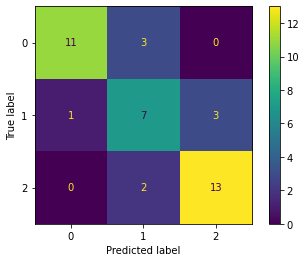

In [ ]:
#Calling Logistic Regression function for Train-Validation-Test
logregress(X_train,X_val,X_test,y_train,y_val,y_test,dataname)

LINEAR SVM for  wine Dataset: 

Score for validation data of  wine Dataset:  0.9375
Accuracy score of prediction for  wine Dataset:  0.9375
R^2 scorefor  wine Dataset:  0.9162303664921466
Precision score for  wine Dataset:  0.9444444444444444
F1 score for  wine Dataset:  0.9375
Recall score for  wine Dataset:  0.8947368421052632
ROC AUC: for wine Dataset: 0.954212962962963
Crossvalidation score for  wine Dataset:  [1.   0.85 0.8  0.9  0.85 0.75 0.9  0.9  1.   0.9 ]
Crossvalidation score mean:  0.8850000000000001
Crossvalidation score standard deviation:  0.07433034373659253





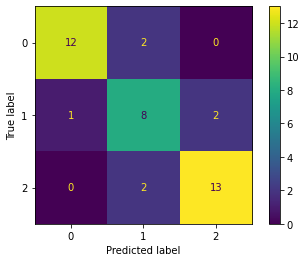

In [ ]:
#Calling SVM function for Train-Validation-Test
supvector(X_train,X_val,X_test,y_train,y_val,y_test,dataname)

GAUSSIAN NAIVE BAYES for  wine Dataset: 

Score for validation data of  wine Dataset:  0.8125
Accuracy score of prediction for  wine Dataset:  0.8125
R^2 scorefor  wine Dataset:  0.4973821989528796
Precision score for  wine Dataset:  0.7894736842105263
F1 score for  wine Dataset:  0.8125
Recall score for  wine Dataset:  0.7894736842105263
ROC AUC: for wine Dataset: 0.882662037037037
Crossvalidation score for  wine Dataset:  [0.85 0.8  0.65 0.65 0.65 0.7  0.9  0.6  0.9  0.75]
Crossvalidation score mean:  0.7450000000000001
Crossvalidation score standard deviation:  0.10594810050208546





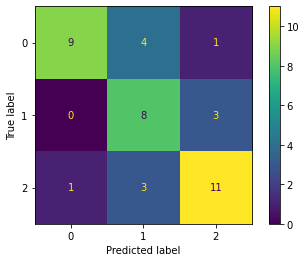

In [ ]:
#Calling GNB function for Train-Validation-Test
gaussnb(X_train,X_val,X_test,y_train,y_val,y_test,dataname)

RANDOM FORESTS for  wine Dataset: 

Score for validation data of  wine Dataset:  0.78125
Accuracy score of prediction for  wine Dataset:  0.78125
R^2 scorefor  wine Dataset:  0.32984293193717273
Precision score for  wine Dataset:  0.7777777777777778
F1 score for  wine Dataset:  0.78125
Recall score for  wine Dataset:  0.7368421052631579
ROC AUC: for wine Dataset: 0.9390740740740741
Crossvalidation score for  wine Dataset:  [0.95 0.8  0.8  0.7  0.8  0.85 0.85 0.7  0.95 0.75]
Crossvalidation score mean:  0.8149999999999998
Crossvalidation score standard deviation:  0.08381527307120104





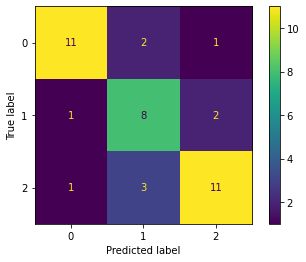

In [ ]:
#Calling Random Forest function for Train-Validation-Test
randforest(X_train,X_val,X_test,y_train,y_val,y_test,dataname)

### **3.4 KFOLD**

In [ ]:
#Drop column class
X=df1.drop(columns='class')
y=df1['class']

In [ ]:
#Perform Kfold split
kfold = KFold(n_splits=4, random_state=0, shuffle=True)
# print the folds
for X_train, X_test in kfold.split(X):
  print("Train: %s \nTest: %s\n" % (X_train, X_test))

Train: [  0   1   2   3   6   9  10  11  13  14  15  17  19  20  21  23  24  25
  27  28  29  30  31  32  34  35  36  38  39  40  41  42  43  46  47  48
  49  50  51  52  53  54  56  57  58  59  62  64  65  67  68  69  70  71
  72  73  76  77  78  79  81  82  84  85  86  87  88  89  90  91  92  93
  94  95  96  97  99 100 101 102 103 104 105 108 109 110 112 114 115 116
 117 119 120 121 124 126 127 128 131 132 133 135 136 137 138 139 140 141
 142 144 147 148 149 151 153 155 156 157 158 160 161 162 163 164 165 166
 167 169 171 172 173 174 175 176 178 181 184 186 187 188 190 191 192 193
 194 195 196 197 198 199] 
Test: [  4   5   7   8  12  16  18  22  26  33  37  44  45  55  60  61  63  66
  74  75  80  83  98 106 107 111 113 118 122 123 125 129 130 134 143 145
 146 150 152 154 159 168 170 177 179 180 182 183 185 189]

Train: [  0   1   3   4   5   6   7   8   9  11  12  13  15  16  17  18  20  21
  22  23  25  26  28  29  31  32  33  34  35  36  37  38  39  41  42  44
  45  47  48  49  

Logistic Regression

In [ ]:
#Perform Logistic Regression and calculate scores
classifier = LogisticRegression()
kfold_scoring(classifier)

Results from all folds:  [0.9  0.92 0.86 0.84]
Accuracy: 88.000% (3.162%)


SVM

In [ ]:
#Perform SVM and calculate scores
classifier = SVC(kernel = 'linear', random_state = 0, probability=True)
kfold_scoring(classifier)

Results from all folds:  [0.9  0.9  0.88 0.9 ]
Accuracy: 89.500% (0.866%)


Gaussian Naive Bayes

In [ ]:
#Perform GNB and calculate scores
classifier = GaussianNB()
kfold_scoring(classifier)

Results from all folds:  [0.84 0.72 0.66 0.76]
Accuracy: 74.500% (6.538%)


Random Forest

In [ ]:
#Perform Random forest and calculate scores
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
kfold_scoring(classifier)

Results from all folds:  [0.88 0.86 0.78 0.82]
Accuracy: 83.500% (3.841%)


## **4. BREAST CANCER DATASET**


The Breast cancer wisconsin (diagnostic) dataset is freely available in skilearn library. Also, this dataset is publicaly available in UCI Machine learning Repository.

 It consists:

*  Number of instances : 569
*  Number of Attributes: 30 (numeric, predictive attributes and the class)
* Attributes:

   - radius (mean of distances from center to points on the perimeter)
     
   - texture (standard deviation of gray-scale values)
   - perimeter
   - area
   - smoothness (local variation in radius lengths)
   - compactness (perimeter^2 / area - 1.0)
   - concavity (severity of concave portions of the contour)
   - concave points (number of concave portions of the contour)
   - symmetry 
   - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.

        For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.
* Class: 
  
    -Malignant

    -Benign
* Missing Attribute Values: None

* Class Distribution: 212 - Malignant,        357 - Benign

In [ ]:
#Import and load Breast Cancer Dataset 

from sklearn import datasets

breastcancer = datasets.load_breast_cancer()

breastcancerdata = pd.DataFrame(data=breastcancer.data, columns=breastcancer.feature_names)

breastcancerdata["label"] = breastcancer.target

dataname = 'breastcancer'

### **4.1 HISTOGRAM**

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


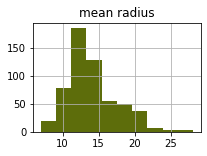

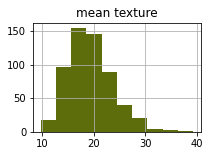

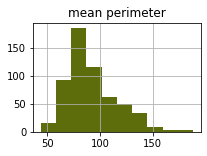

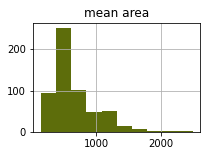

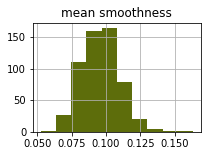

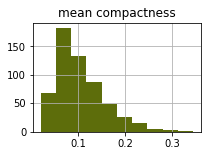

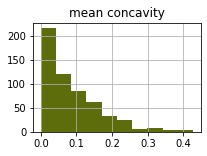

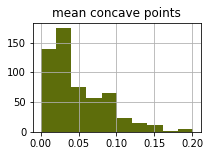

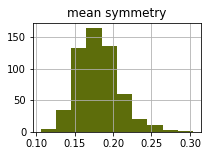

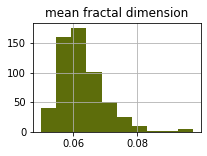

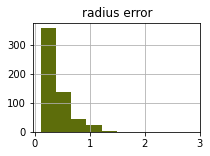

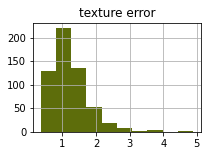

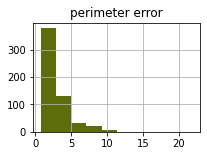

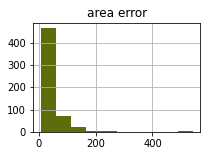

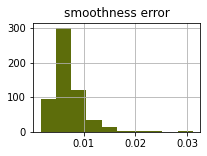

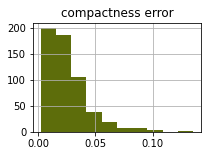

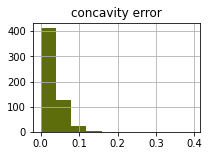

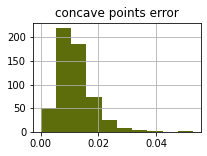

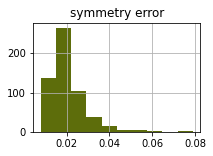

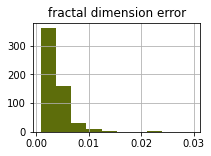

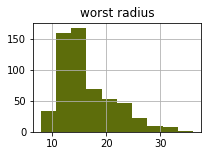

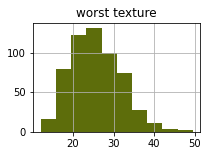

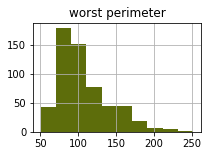

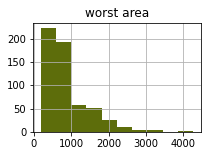

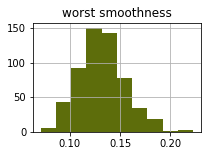

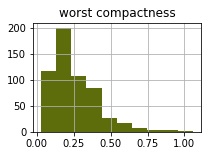

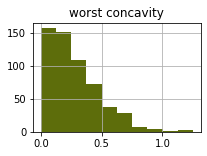

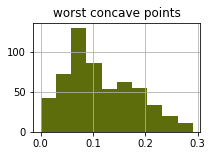

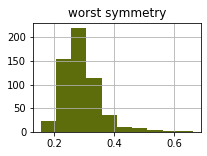

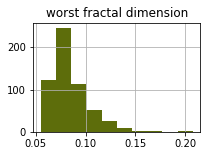

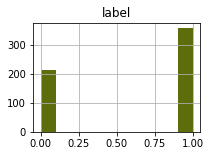

In [ ]:
#Plot histogram 
for wd in breastcancerdata:
    breastcancerdata.hist(column=wd,color='#5D6D0B',figsize=(3,2))  

### **4.2 TRAIN-TEST**

In [ ]:
#Drop column class
X=df1.drop(columns='class')
y=df1['class']

In [ ]:
#Split dataset into Train-Test
X_train,X_test,y_train,y_test,X=splitdata_tt(X,y)

LOGISTIC REGRESSION for  breastcancer Dataset: 

Accuracy score of prediction for  breastcancer Dataset:  0.85
R^2 score for  breastcancer Dataset:  0.7775718257645968
Precision score for  breastcancer Dataset:  0.7931034482758621
F1 score for  breastcancer Dataset:  0.85
Recall score for  breastcancer Dataset:  0.8846153846153846
ROC AUC: for breastcancer Dataset: 0.9540909090909091
Crossvalidation score for  breastcancer Dataset:  [1.   0.8  0.8  0.8  0.85 0.8  0.85 0.8  0.9  0.95]
Crossvalidation score mean:  0.8550000000000001
Crossvalidation score standard deviation:  0.06873863542433759





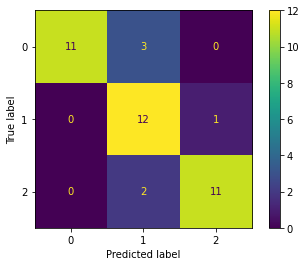

In [ ]:
#Calling Logistic Regression function for Train-Validation-Test
logregress_tt(X_train,X_test,y_train,y_test,dataname)

LINEAR SVM for  breastcancer Dataset: 

Accuracy score of prediction for  breastcancer Dataset:  0.875
R^2 score for  breastcancer Dataset:  0.8146431881371641
Precision score for  breastcancer Dataset:  0.8214285714285714
F1 score for  breastcancer Dataset:  0.875
Recall score for  breastcancer Dataset:  0.8846153846153846
ROC AUC: for breastcancer Dataset: 0.9706250000000001
Crossvalidation score for  breastcancer Dataset:  [1.   0.85 0.8  0.9  0.85 0.75 0.9  0.9  1.   0.9 ]
Crossvalidation score mean:  0.8850000000000001
Crossvalidation score standard deviation:  0.07433034373659253





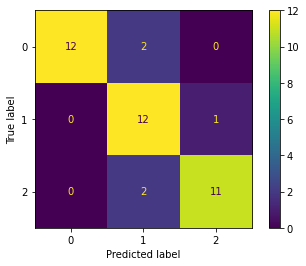

In [ ]:
#Calling SVM function for Train-Validation-Test
supvector_tt(X_train,X_test,y_train,y_test,dataname)

GAUSSIAN NAIVE BAYES for  breastcancer Dataset: 

Accuracy score of prediction for  breastcancer Dataset:  0.775
R^2 score for  breastcancer Dataset:  0.44392956441149206
Precision score for  breastcancer Dataset:  0.75
F1 score for  breastcancer Dataset:  0.775
Recall score for  breastcancer Dataset:  0.8076923076923077
ROC AUC: for breastcancer Dataset: 0.8739204545454546
Crossvalidation score for  breastcancer Dataset:  [0.85 0.8  0.65 0.65 0.65 0.7  0.9  0.6  0.9  0.75]
Crossvalidation score mean:  0.7450000000000001
Crossvalidation score standard deviation:  0.10594810050208546





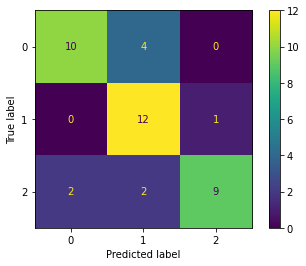

In [ ]:
#Calling GNB function for Train-Validation-Test
gaussnb_tt(X_train,X_test,y_train,y_test,dataname)

RANDOM FORESTS for  breastcancer Dataset: 

Accuracy score of prediction for  breastcancer Dataset:  0.825
R^2 score for  breastcancer Dataset:  0.6292863762743282
Precision score for  breastcancer Dataset:  0.75
F1 score for  breastcancer Dataset:  0.825
Recall score for  breastcancer Dataset:  0.8076923076923077
ROC AUC: for breastcancer Dataset: 0.9321306818181817
Crossvalidation score for  breastcancer Dataset:  [0.95 0.8  0.8  0.7  0.8  0.85 0.85 0.7  0.95 0.75]
Crossvalidation score mean:  0.8149999999999998
Crossvalidation score standard deviation:  0.08381527307120104





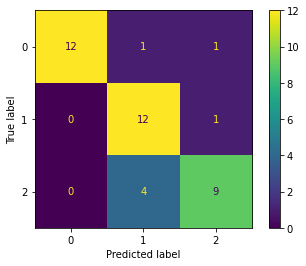

In [ ]:
#Calling Random Forest function for Train-Validation-Test
randforest_tt(X_train,X_test,y_train,y_test,dataname)

### **4.3 TRAIN-VALIDATION-TEST**

In [ ]:
#Drop column class
X=df1.drop(columns='class')
y=df1['class']

In [ ]:
#Split dataset into Train-Validate-Test
X_train,X_test,y_train,y_test,X=splitdata_tt(X,y)
X_train,X_val,X_test,y_train,y_val,y_test,X=splitdata_tvt(X,y)

LOGISTIC REGRESSION for  breastcancer Dataset: 

Score for validation data of  breastcancer Dataset:  0.875
Accuracy score of prediction for  breastcancer Dataset:  0.875
R^2 scorefor  breastcancer Dataset:  0.8258503401360544
Precision score for  breastcancer Dataset:  0.8571428571428571
F1 score for  breastcancer Dataset:  0.875
Recall score for  breastcancer Dataset:  0.9
ROC AUC: for breastcancer Dataset: 0.9209071869488537
Crossvalidation score for  breastcancer Dataset:  [1.   0.8  0.8  0.8  0.85 0.8  0.85 0.8  0.9  0.95]
Crossvalidation score mean:  0.8550000000000001
Crossvalidation score standard deviation:  0.06873863542433759





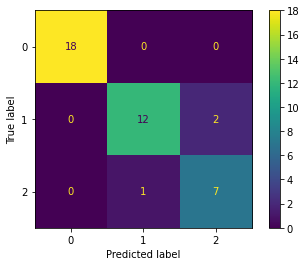

In [ ]:
#Calling Logistic Regression function for Train-Validation-Test
logregress(X_train,X_val,X_test,y_train,y_val,y_test,dataname)

LINEAR SVM for  breastcancer Dataset: 

Score for validation data of  breastcancer Dataset:  0.90625
Accuracy score of prediction for  breastcancer Dataset:  0.90625
R^2 scorefor  breastcancer Dataset:  0.8693877551020408
Precision score for  breastcancer Dataset:  0.8636363636363636
F1 score for  breastcancer Dataset:  0.90625
Recall score for  breastcancer Dataset:  0.95
ROC AUC: for breastcancer Dataset: 0.9540024250440917
Crossvalidation score for  breastcancer Dataset:  [1.   0.85 0.8  0.9  0.85 0.75 0.9  0.9  1.   0.9 ]
Crossvalidation score mean:  0.8850000000000001
Crossvalidation score standard deviation:  0.07433034373659253





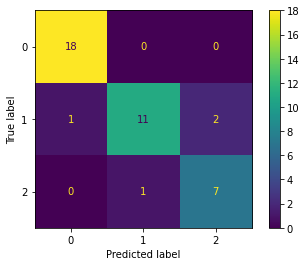

In [ ]:
#Calling SVM function for Train-Validation-Test
supvector(X_train,X_val,X_test,y_train,y_val,y_test,dataname)

GAUSSIAN NAIVE BAYES for  breastcancer Dataset: 

Score for validation data of  breastcancer Dataset:  0.71875
Accuracy score of prediction for  breastcancer Dataset:  0.71875
R^2 scorefor  breastcancer Dataset:  0.6081632653061224
Precision score for  breastcancer Dataset:  0.6521739130434783
F1 score for  breastcancer Dataset:  0.71875
Recall score for  breastcancer Dataset:  0.75
ROC AUC: for breastcancer Dataset: 0.830843253968254
Crossvalidation score for  breastcancer Dataset:  [0.85 0.8  0.65 0.65 0.65 0.7  0.9  0.6  0.9  0.75]
Crossvalidation score mean:  0.7450000000000001
Crossvalidation score standard deviation:  0.10594810050208546





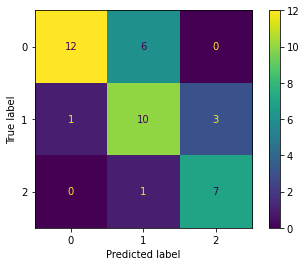

In [ ]:
#Calling GNB function for Train-Validation-Test
gaussnb(X_train,X_val,X_test,y_train,y_val,y_test,dataname)

RANDOM FORESTS for  breastcancer Dataset: 

Score for validation data of  breastcancer Dataset:  0.75
Accuracy score of prediction for  breastcancer Dataset:  0.75
R^2 scorefor  breastcancer Dataset:  0.5210884353741496
Precision score for  breastcancer Dataset:  0.7368421052631579
F1 score for  breastcancer Dataset:  0.75
Recall score for  breastcancer Dataset:  0.7
ROC AUC: for breastcancer Dataset: 0.9217741402116403
Crossvalidation score for  breastcancer Dataset:  [0.95 0.8  0.8  0.7  0.8  0.85 0.85 0.7  0.95 0.75]
Crossvalidation score mean:  0.8149999999999998
Crossvalidation score standard deviation:  0.08381527307120104





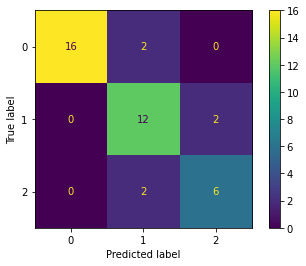

In [ ]:
#Calling Random forest function for Train-Validation-Test
randforest(X_train,X_val,X_test,y_train,y_val,y_test,dataname)

### **4.4 K-FOLD**

In [ ]:
#Drop column class
X=df1.drop(columns='class')
y=df1['class']

In [ ]:
#Perform kfold split
kfold = KFold(n_splits=4, random_state=0, shuffle=True)
# print the folds
for X_train, X_test in kfold.split(X):
  print("Train: %s \nTest: %s\n" % (X_train, X_test))

Train: [  0   1   2   3   6   9  10  11  13  14  15  17  19  20  21  23  24  25
  27  28  29  30  31  32  34  35  36  38  39  40  41  42  43  46  47  48
  49  50  51  52  53  54  56  57  58  59  62  64  65  67  68  69  70  71
  72  73  76  77  78  79  81  82  84  85  86  87  88  89  90  91  92  93
  94  95  96  97  99 100 101 102 103 104 105 108 109 110 112 114 115 116
 117 119 120 121 124 126 127 128 131 132 133 135 136 137 138 139 140 141
 142 144 147 148 149 151 153 155 156 157 158 160 161 162 163 164 165 166
 167 169 171 172 173 174 175 176 178 181 184 186 187 188 190 191 192 193
 194 195 196 197 198 199] 
Test: [  4   5   7   8  12  16  18  22  26  33  37  44  45  55  60  61  63  66
  74  75  80  83  98 106 107 111 113 118 122 123 125 129 130 134 143 145
 146 150 152 154 159 168 170 177 179 180 182 183 185 189]

Train: [  0   1   3   4   5   6   7   8   9  11  12  13  15  16  17  18  20  21
  22  23  25  26  28  29  31  32  33  34  35  36  37  38  39  41  42  44
  45  47  48  49  

Logistic Regression

In [ ]:
#Perform Logistic Regression and calculate scores
classifier = LogisticRegression()
kfold_scoring(classifier)

Results from all folds:  [0.9  0.92 0.86 0.84]
Accuracy: 88.000% (3.162%)


SVM

In [ ]:
#Perform SVM and calculate scores
classifier = SVC(kernel = 'linear', random_state = 0, probability=True)
kfold_scoring(classifier)

Results from all folds:  [0.9  0.9  0.88 0.9 ]
Accuracy: 89.500% (0.866%)


Gaussian Naive bayes

In [ ]:
#Perform GNB and calculate scores
classifier = GaussianNB()
kfold_scoring(classifier)

Results from all folds:  [0.84 0.72 0.66 0.76]
Accuracy: 74.500% (6.538%)


Random forest

In [ ]:
#Perform Random forest and calculate scores
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
kfold_scoring(classifier)

Results from all folds:  [0.88 0.86 0.78 0.82]
Accuracy: 83.500% (3.841%)


# **Summary:**

1. Synthetic dataset: 

   The data has been classified into 3 classes,  200 samples and 6 features. The model is then trained, fit and predicted using Logistic Regression, support vector machine, gaussian naive bayes and random forest. 


  Accuracy of prediction of synthetic data in different clssification models are:


 *   Logistic regression    - 82.5%
 *   Support vector machine - 80%
 *   Gaussian naive bayes   - 80%
 *  Random forest           - 75%




 Accuracy of validation of synthetic data in different clssification models are;


*   Logistic regression    - 84.375%
*   Support vector machine - 81.25%
*   Gaussian naive bayes   - 78.125%
*   Random forest          - 78.125%




 Accuracy of K-fold in different classification models are;

*   Logistic regression    - 78%
*   Support vector machine - 77%
*   Gaussian naive bayes   - 73.5%
*   Random forest          - 74.5%





2. Iris dataset:

 The data has been classified into 3 classes namely Iris-versicolor, Iris-virginica and Iris-setosa with each of the class having 50, 50 and 49 samples. The model is then trained, fit and predicted using Logistic Regression, support vector machine, gaussian naive bayes and random forest. 



  Accuracy of prediction in different classification models are;


 *   Logistic regression    - 80%
 *   Support vector machine - 75%
 *   Gaussian naive bayes   - 77.5%
 *  Random forest           - 75%




 Accuracy of validation in different classification models are;


*   Logistic regression    - 78.125%
*   Support vector machine - 78.125%
*   Gaussian naive bayes   - 78.125%
*   Random forest          - 81.25%



 Accuracy of K-fold in different classification models are;

*   Logistic regression    - 78%
*   Support vector machine - 77%
*   Gaussian naive bayes   - 73.5%
*   Random forest          - 74.5%





3. Wine dataset:

 The data has been classified into 3 classes (0, 1 and 2) with each of the class having 59, 71 and 48 samples. Histograms were also plotted for each of these variables to check the relation of class.



  Accuracy of prediction in different clssification models are;


 *   Logistic regression    - 85%
 *   Support vector machine - 87.5%
 *   Gaussian naive bayes   - 80%
 *  Random forest           - 77.5%


 Accuracy of validation in different clssification models are;


*   Logistic regression    - 81.25%
*   Support vector machine - 78.125%
*   Gaussian naive bayes   - 75%
*   Random forest          - 78.125%



 Accuracy of K-fold in different classification models are;

*   Logistic regression    - 78%
*   Support vector machine - 77%
*   Gaussian naive bayes   - 73.5%
*   Random forest          - 74.5%




4. Breast Dataset:

 The data has been classified into 2 classes (Malignant, Benign) with each of the class having 212 and 357 samples and 30 number of attributes. Histograms were also plotted for each of these variables to check the relation of class.




 Accuracy of prediction in different clssification models are:


 *   Logistic regression    - 80%
 *   Support vector machine - 82.5%
 *   Gaussian naive bayes   - 72.5%
 *  Random forest           - 72.5%




 Accuracy of validation in different clssification models are:



*   Logistic regression    - 84.375%
*   Support vector machine - 90.625%
*   Gaussian naive bayes   - 78.125%
*   Random forest          - 78.125%



 Accuracy of K-fold in different classification models are:


*   Logistic regression    - 78%
*   Support vector machine - 77%
*   Gaussian naive bayes   - 73.5%
*   Random forest          - 74.5%


Here, Accuracy of K-Fold in different classification model for 4 dataset are same.
In case of synthetic dataset and Iris dataset, the best classifier is logistic regression. Because it provides an accuracy of 82.5% for synthetic dataset and 80% for Iris dataset, which is higher than Gaussian naive bayes, support vector machine and Random forest.

For Wine dataset and Breast cancer wisconsin (diagnostic) dataset, support vector machine provides highest accuracy than others. The accuracy of wine dataset is 87.5% and breast dataset is 82.5%.

## **REFERENCE**

1. Wong, Jason(2020). *Logistic Regression Explained*. Available at: https://towardsdatascience.com/logistic-regression-explained-afc267815943
2. Vatsal. *Support Vector Machine(SVM) explained*. Available at: https://towardsdatascience.com/support-vector-machine-svm-explained-58e59708cae3
3. Rasmussen, Stefan Hrouda(2021). *(Gaussian) Naive Bayes*. Available at: https://towardsdatascience.com/gaussian-naive-bayes-4d2895d139a
4. *Gaussian Naive Bayes*. Available at: https://iq.opengenus.org/gaussian-naive-bayes/
5. Ram, Sandeep(2020). *Mastering Random Forests: A comprehensive guide*. Available at: https://towardsdatascience.com/mastering-random-forests-a-comprehensive-guide-51307c129cb1
6. E.R, Sruthi(2021). *Understanding Random Forest*, Available at: https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/
 



